<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325"> Pandas </h1>

![pandas-logo](http://pandas.pydata.org/_static/pandas_logo.png)

In [1]:
import pandas as pd

Pandas tiene dos estructuras principales para trabajar con la información: `pandas.Series` y `pandas.DataFrame`. Los `pandas.Series` es un arreglo matricial con $n$ elementos del mismo tipo, por otro lado, los `pandas.DataFrame` es una colección de $m$ `pandas.Series` no necesariamente del mismo tipo, pero sí con el mismo número $n$ de elementos.

### ¿Cómo crear un Series y un DataFrame desde Python?

In [2]:
# Creando un Series
some_data = [i ** i for i in range(5)]
pd.Series(some_data)

0      1
1      1
2      4
3     27
4    256
dtype: int64

In [3]:
# Creando un Series y agregando información sobre los datos a trabajar
some_data = [i ** i for i in range(5)]
pd.Series(some_data, name="x_to_x")

0      1
1      1
2      4
3     27
4    256
Name: x_to_x, dtype: int64

In [4]:
# Creando un Series y agregando información sobre cada índice y el nombre
# de los datos a trabajar
ages = [21, 23, 30, 19, 3]
names = ["John", "Timmy", "Kenny", "Isaac", "Yann"]
pd.Series(ages, index=names, name="people")

John     21
Timmy    23
Kenny    30
Isaac    19
Yann      3
Name: people, dtype: int64

**¿Cuándo usar un `np.array` y cuando un `pd.Series`?**

Dependiendo de la estrucutura de los datos con los que estémos trabajando se decidirá si usar un numpy array o un pandas' Series. 

**¿Qué propiedades(métodos) contiene un Series?**

In [5]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages = [21, 23, 23, 19, 3]
personas_edades = pd.Series(ages, index=names, name="people")

In [6]:
# Al igual que un numpy array, podemos conocer la dimension de un Series
personas_edades.shape

(5,)

In [7]:
personas_edades.sort_index()

Isaac     3
John     21
Kenny    23
Timmy    23
Yann     19
Name: people, dtype: int64

In [8]:
# Acceder nombres
personas_edades["Yann"]

19

In [9]:
# Modificar valores
personas_edades["Yann"] += 1
personas_edades["Yann"]

20

In [10]:
# Estádisticos básicos
personas_edades.describe()

count     5.000000
mean     18.000000
std       8.485281
min       3.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      23.000000
Name: people, dtype: float64

In [11]:
# otros estadísticos
personas_edades.kurtosis()

4.5318287037037042

In [12]:
# Tabla de frecuencias
personas_edades.value_counts()

23    2
21    1
20    1
3     1
Name: people, dtype: int64

**Creando un primer Pandas DataFrame**

In [58]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages_list = [21, 23, 23, 19, 3]
colors_list = ["teal", "black", "crimson", "yellow", "white"]
amount_list = [10_000, 100_000, 23_000, 5_000, 11_000]

personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list,
                         "bank": amount_list}, index=names)
personas.shape

(5, 3)

In [59]:
personas

,ages,bank,colors
John,21,10000,teal
Timmy,23,100000,black
Kenny,23,23000,crimson
Yann,19,5000,yellow
Isaac,3,11000,white


**Accediendo a los elementos del `DataFrame`**

In [60]:
# Tomando una columna como un pd.Series
personas["ages"]

John     21
Timmy    23
Kenny    23
Yann     19
Isaac     3
Name: ages, dtype: int64

In [62]:
# Tomando una columna como un pd.Series, tomando una fila como el índice del Series
personas["ages"]["Isaac"]

3

In [16]:
# Existe otra manera de acceder a una columna de un DataFrame
# considerando el nombre de la columna como un atributo
# del DF. Eso aplica si y solo si el nombre no contiene espacios
# o puntos dentro del nombre
personas.ages

John     21
Timmy    23
Kenny    23
Yann     19
Isaac     3
Name: ages, dtype: int64

In [17]:
# Tomando una columna como un pd.DataFrame (subset)
personas[["ages"]]

,ages
John,21
Timmy,23
Kenny,23
Yann,19
Isaac,3


In [18]:
# Tomando una columna como un pd.DataFrame
personas[["ages","colors"]]

,ages,colors
John,21,teal
Timmy,23,black
Kenny,23,crimson
Yann,19,yellow
Isaac,3,white


In [19]:
# Podemos considerar todo menos una columna con el
# método 'drop'. 'axis=1' implica que el vector
# a remover es una columna
personas.drop("colors", axis=1)

,ages,bank
John,21,10000
Timmy,23,100000
Kenny,23,23000
Yann,19,5000
Isaac,3,11000


In [20]:
# Podemos considerar todo menos una fila con el
# método 'drop', 'axis=0' implica que el vector
# a remover es una fila
personas.drop("Timmy", axis=0)

,ages,bank,colors
John,21,10000,teal
Kenny,23,23000,crimson
Yann,19,5000,yellow
Isaac,3,11000,white


In [21]:
# Regresar el valor de una columna como un numpy array
personas.ages.values

array([21, 23, 23, 19,  3])

**A veces, es necesario conseguir el valor de una fila. En dichas ocasiones, usamos las propiedades `loc` y `iloc`**

`.loc`

In [22]:
# Indice basado en el nombre; no en la posicion
personas.loc["John"]

ages         21
bank      10000
colors     teal
Name: John, dtype: object

In [23]:
# Indice basado en el nombre; no en la posicion
personas.loc["John", "bank"]

10000

In [24]:
# Indice basado en el nombre; no en la posicion
personas.loc["John", ["bank", "colors"]]

bank      10000
colors     teal
Name: John, dtype: object

`.iloc`

In [25]:
# Indice basado en el índice; no en el nombre
personas.iloc[0]

ages         21
bank      10000
colors     teal
Name: John, dtype: object

In [26]:
# Indice basado en el índice; no en el nombre
personas.iloc[0, 1]

10000

In [27]:
# Indice basado en el índice; no en el nombre
personas.iloc[0, [1,2]]

bank      10000
colors     teal
Name: John, dtype: object

## Mergers and joins
¿Qué pasa cuando queremos juntar dos DataFrames?

In [28]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages_list = [21, 23, 23, 19, 3]
colors_list = ["teal", "black", "crimson", "yellow", "white"]
amount_list = [10_000, 100_000, 23_000, 5_000, 11_000]

personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list}, index=names)
personas_bank = pd.DataFrame({"bank": amount_list}, index=names)

In [29]:
personas

,ages,colors
John,21,teal
Timmy,23,black
Kenny,23,crimson
Yann,19,yellow
Isaac,3,white


In [30]:
personas_bank

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000
Isaac,11000


**Juntando DataFrames con `join`**

Nota: usamos un `join` en pandas cuando sabemos que ambos `DataFrames` comparten, al menos, un elemento en el índice

In [31]:
personas.join(personas_bank)

,ages,colors,bank
John,21,teal,10000
Timmy,23,black,100000
Kenny,23,crimson,23000
Yann,19,yellow,5000
Isaac,3,white,11000


¿Qué pasa cuando no tenemos el mismo número de índices?

In [32]:
personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list}, index=names)
personas_bank = pd.DataFrame({"bank": amount_list[:-1]}, index=names[:-1])

In [33]:
personas_bank

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000


In [34]:
personas

,ages,colors
John,21,teal
Timmy,23,black
Kenny,23,crimson
Yann,19,yellow
Isaac,3,white


In [35]:
# En tal caso, pandas se encarga de llenar los valores vacíos por nosotros
personas.join(personas_bank)

,ages,colors,bank
John,21,teal,10000.0
Timmy,23,black,100000.0
Kenny,23,crimson,23000.0
Yann,19,yellow,5000.0
Isaac,3,white,NaN


**Juntando DataFrames con `merge`**

Usamos un `merge` cuando la colúmna de referencia sobre la cuál uniremos no se encuentra en el índice.

In [36]:
personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list,
                         "names_person": names})

personas_bank = pd.DataFrame({"bank": amount_list,
                              "person_names": names})

In [37]:
personas

,ages,colors,names_person
0,21,teal,John
1,23,black,Timmy
2,23,crimson,Kenny
3,19,yellow,Yann
4,3,white,Isaac


In [38]:
personas_bank

,bank,person_names
0,10000,John
1,100000,Timmy
2,23000,Kenny
3,5000,Yann
4,11000,Isaac


In [39]:
personas_bank.merge(personas, right_on="names_person", left_on="person_names")

,bank,person_names,ages,colors,names_person
0,10000,John,21,teal,John
1,100000,Timmy,23,black,Timmy
2,23000,Kenny,23,crimson,Kenny
3,5000,Yann,19,yellow,Yann
4,11000,Isaac,3,white,Isaac


### Agregando filas con `append` 

In [40]:
names1 = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
amount_list1 = [10_000, 100_000, 23_000, 5_000, 11_000]

names2 = ["Gerardo", "Luis"]
amount_list2 = [1e6, 10e6]

personas_bank1 = pd.DataFrame({"bank": amount_list1}, index=names1)
personas_bank2 = pd.DataFrame({"bank": amount_list2}, index=names2)

In [41]:
personas_bank1

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000
Isaac,11000


In [42]:
personas_bank2

,bank
Gerardo,1000000.0
Luis,10000000.0


In [43]:
personas_bank1.append(personas_bank2)

,bank
John,10000.0
Timmy,100000.0
Kenny,23000.0
Yann,5000.0
Isaac,11000.0
Gerardo,1000000.0
Luis,10000000.0


## Pivot Tables and DataFrame manipulations 

In [44]:
from pydataset import data
import matplotlib.pyplot as plt

In [88]:
iris = data("iris")

In [46]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [47]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

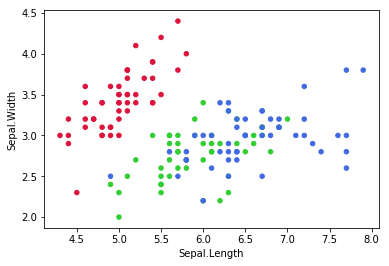

In [49]:
color_map = {"setosa": "crimson",
             "virginica": "royalblue",
             "versicolor": "limegreen"}
colors = [color_map[c] for c in iris.Species]
iris.plot(x="Sepal.Length", y="Sepal.Width", kind="scatter", c=colors)
plt.show()

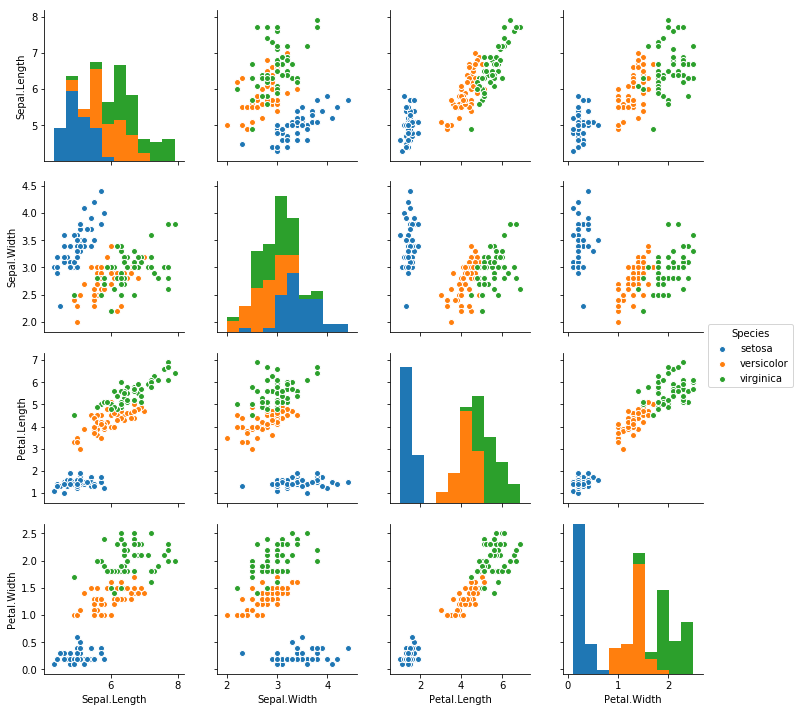

In [93]:
import seaborn as sns
sns.pairplot(iris, hue="Species")
plt.show()

**Creando nuevos features (propiedades) sobre la información**

Para la base de datos `iris`, conocemos el largo y el ancho tanto del tallo tanto del pétalo como del tallo. Crearemos entonces una nueva columna con el área de cada una de estas partes

In [118]:
iris["Sepal.Area"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["Petal.Area"] = iris["Petal.Length"] * iris["Petal.Width"]
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area,Petal.Area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28


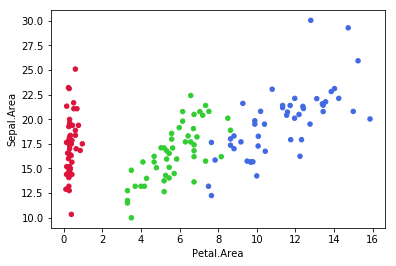

In [87]:
color_map = {"setosa": "crimson",
             "virginica": "royalblue",
             "versicolor": "limegreen"}
colors = [color_map[c] for c in iris.Species]
iris.plot(x="Petal.Area", y="Sepal.Area", kind="scatter", c=colors)
plt.show()

¿Cómo resumir los datos que tenemos?

Tablas dinámicas

In [119]:
iris.pivot_table(index="Species", aggfunc="mean")

,Petal.Area,Petal.Length,Petal.Width,Sepal.Area,Sepal.Length,Sepal.Width
Species,,,,,,
setosa,0.3656,1.462,0.246,17.2578,5.006,3.428
versicolor,5.7204,4.260,1.326,16.5262,5.936,2.770
virginica,11.2962,5.552,2.026,19.6846,6.588,2.974


In [51]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


---------
### Un segundo ejemplo

In [52]:
cars = data("mtcars")

In [53]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [54]:
cars.pivot_table(index="cyl", columns="am", values=["hp", "mpg"])

hp                 mpg           
am            0           1       0          1
cyl                                           
4     84.666667   81.875000  22.900  28.075000
6    115.250000  131.666667  19.125  20.566667
8    194.166667  299.500000  15.050  15.400000

## Queries

In [66]:
titanic = data("Titanic")
titanic.head()

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0


**Haciendo `maps` para acceder filtrar columnas**

In [71]:
titanic["Class"] == "1st"

1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29     True
30    False
31    False
32    False
Name: Class, dtype: bool

In [72]:
titanic[titanic["Class"] == "1st"]

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
5,1st,Female,Child,No,0
9,1st,Male,Adult,No,118
13,1st,Female,Adult,No,4
17,1st,Male,Child,Yes,5
21,1st,Female,Child,Yes,1
25,1st,Male,Adult,Yes,57
29,1st,Female,Adult,Yes,140


In [73]:
titanic[titanic["Survived"] == "Yes"]

,Class,Sex,Age,Survived,Freq
17,1st,Male,Child,Yes,5
18,2nd,Male,Child,Yes,11
19,3rd,Male,Child,Yes,13
20,Crew,Male,Child,Yes,0
21,1st,Female,Child,Yes,1
22,2nd,Female,Child,Yes,13
23,3rd,Female,Child,Yes,14
24,Crew,Female,Child,Yes,0
25,1st,Male,Adult,Yes,57
26,2nd,Male,Adult,Yes,14


**Usando `.query` podemos realizar esta misma operación**

In [80]:
titanic.query("Class == '1st'")

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
5,1st,Female,Child,No,0
9,1st,Male,Adult,No,118
13,1st,Female,Adult,No,4
17,1st,Male,Child,Yes,5
21,1st,Female,Child,Yes,1
25,1st,Male,Adult,Yes,57
29,1st,Female,Adult,Yes,140


In [75]:
titanic.query("Survived == 'Yes'")

,Class,Sex,Age,Survived,Freq
17,1st,Male,Child,Yes,5
18,2nd,Male,Child,Yes,11
19,3rd,Male,Child,Yes,13
20,Crew,Male,Child,Yes,0
21,1st,Female,Child,Yes,1
22,2nd,Female,Child,Yes,13
23,3rd,Female,Child,Yes,14
24,Crew,Female,Child,Yes,0
25,1st,Male,Adult,Yes,57
26,2nd,Male,Adult,Yes,14


## Exportando información

In [113]:
irispv = iris.pivot_table(index="Species", aggfunc="mean")
irispv

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [114]:
irispv.to_csv("iris_td.csv")

In [115]:
irispv.to_clipboard()

In [116]:
irispv.to_excel("iris_td.xlsx", sheet_name="tabla_din")

## Cargando información

In [8]:
vector = pd.read_csv("../files/lec10/VectorAnalitico20180629MD.csv", encoding="iso-8859-1", low_memory=False)
vector.columns

Index(['FECHA', 'TIPO VALOR', 'EMISORA', 'SERIE', 'Precio Sucio',
       'Precio Limpio', 'INTERESES ACUMULADOS', 'CUPON ACTUAL', 'SOBRETASA',
       'Nombre Completo', 'Sector', 'Monto Emitido', 'Monto Circulación',
       'Fecha Emisión', 'Plazo Emisión', 'Fecha vto', 'Valor Nominal',
       'Moneda Emisión', 'Subyacente', 'Rend Colocación', 'ST Colocación',
       'Frec Cpn', 'Tasa Cupon', 'Días Transc Cpn', 'Regla cupon',
       'Cupones emisión', 'Cupones x cobrar', 'Hecho mkt', 'Fecha UH',
       'Precio Teorico', 'Post Cpra', 'Post Vta', 'Yield Cpra', 'Yields Vta',
       'Spread Cpra', 'Spread vta', 'Mdys', 'S&P', 'Bursatilidad', 'Liquidez',
       'Cambio Diario', 'Cambio Semanal', 'Precio máx 12m', 'Precio min 12m',
       'Suspensión', 'Volatilidad 1', 'Volatilidad 2', 'Duración',
       'Duración Monet.', 'Convexidad', 'VaR', 'Desviación stnd.',
       'Valor nominal actualizado', 'Calificación FITCH',
       'Fecha precio maximo', 'Fecha precio minimo', 'Sensibilidad',
   

In [77]:
cliente = pd.read_csv("../files/lec10/pos_cliente.csv")
cliente.query("Cajon != 'Eurobonos'", inplace=True)
cliente.head()

,Cajon,folio,n_activos,Unnamed: 3
0,Acciones Globales,1I_ACWF_*,680168,NaN
1,Acciones Globales,1I_DFE_*,776783,NaN
2,Acciones Globales,1I_DFJ_*,342611,NaN
3,Acciones Globales,1I_EPP_*,275388,NaN
4,Acciones Globales,1I_EWC_*,767191,NaN


Folio := TIPO_VALOR + EMISORA + SERIE

In [78]:
def make_folio(row):
    return f"{row['TIPO VALOR']}_{row['EMISORA']}_{row['SERIE']}"

In [79]:
vector["folio"] = vector.apply(make_folio, axis=1)

In [80]:
cliente = cliente.merge(vector, on="folio")

In [81]:
cliente["valor"] = cliente["n_activos"] * cliente["Precio Limpio"]

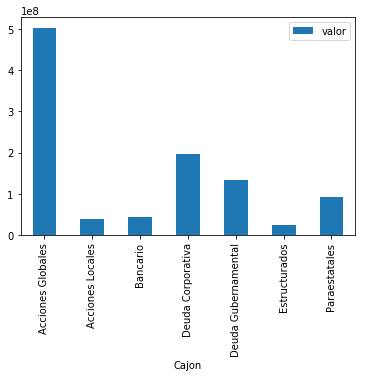

In [82]:
cliente.groupby("Cajon").mean()[["valor"]].query("Cajon != 'Eurobonos'").plot.bar()